In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
def getPath(alg, num):
    numk = num*1000
    if num > 50:
        numk = f"{numk}_cuda"
    return f"trained_models/uno_{alg}_{numk}_result/performance.csv"

def makeDF(alg, num, colTitle=""):
    path = getPath(alg, num)
    df = pd.read_csv(path)

    if colTitle == "":
        colTitle = alg

    df.rename({"reward": colTitle}, axis=1, inplace=True)
    return df

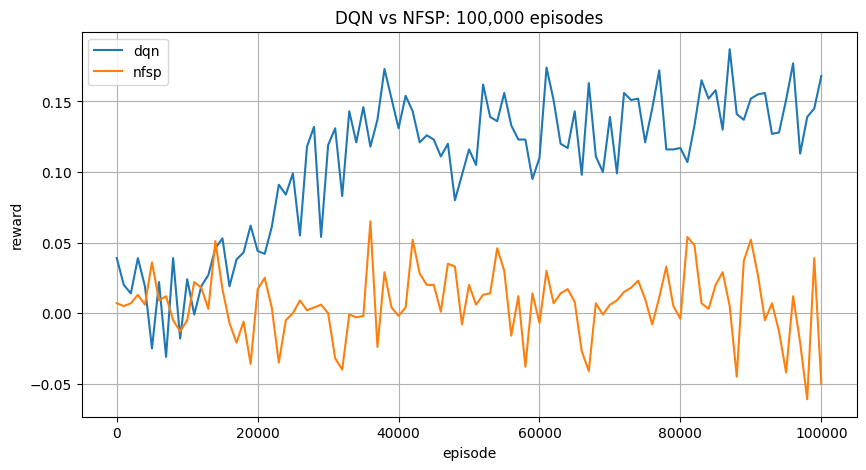

In [39]:
df_dqn = makeDF("dqn", 100)
df_nfsp = makeDF("nfsp", 100)

extracted_col = df_nfsp["nfsp"]
df_combined = pd.concat([df_dqn, extracted_col], axis=1)

plot = df_combined.plot(x='episode', xlabel='episode', ylabel="reward", kind='line', title='DQN vs NFSP: 100,000 episodes', grid=True, legend=True, figsize=(10, 5))

# plot.get_figure().savefig("reward_per_episode.pdf", format="pdf")

<Axes: title={'center': 'DQN vs NFSP: 500,000 episodes'}, xlabel='episode', ylabel='reward'>

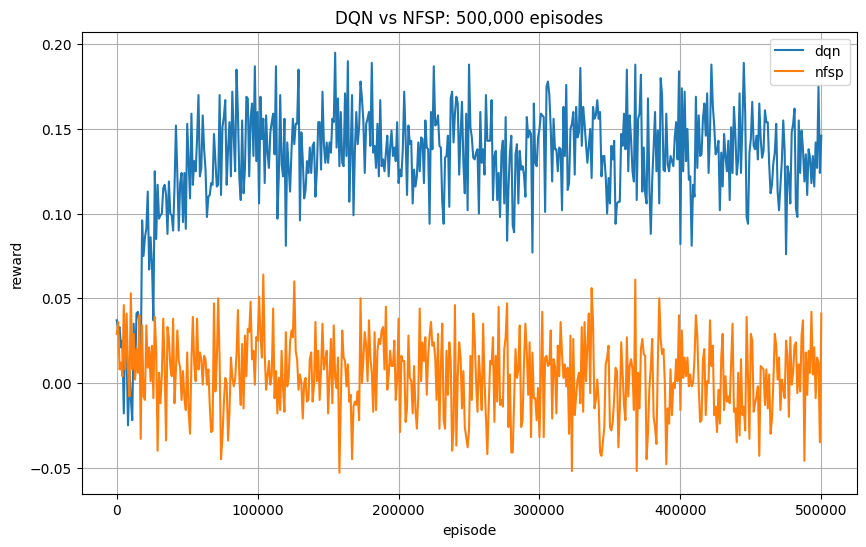

In [44]:
df_dqn = makeDF("dqn", 500)
df_nfsp = makeDF("nfsp", 500)

extracted_col = df_nfsp["nfsp"]
df_combined = pd.concat([df_dqn, extracted_col], axis=1)

plot = df_combined.plot(x='episode', xlabel='episode', ylabel="reward", kind='line', title='DQN vs NFSP: 500,000 episodes', grid=True, legend=True, figsize=(10, 6))

# plot.get_figure().savefig("reward_per_episode.pdf", format="pdf")
plot

<Axes: title={'center': 'NFSP: Episodes'}, xlabel='episode', ylabel='reward'>

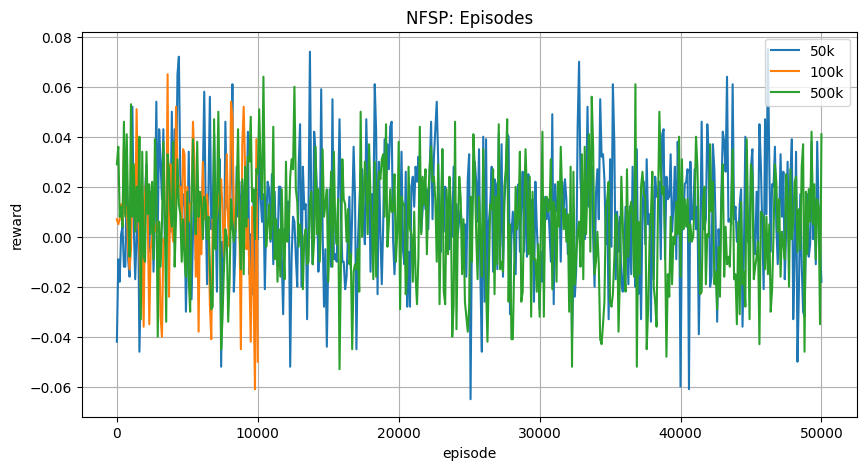

In [42]:

df_nfsp_50 = makeDF("nfsp", 50, "50k")
df_nfsp_100 = makeDF("nfsp", 100)
df_nfsp_500 = makeDF("nfsp", 500)

extracted_cols = [df_nfsp_100["nfsp"].rename("100k"), df_nfsp_500["nfsp"].rename("500k")]
df_combined = pd.concat([df_nfsp_50, extracted_cols[0],extracted_cols[1]], axis=1)

plot = df_combined.plot(x='episode', xlabel='episode', ylabel="reward", kind='line', title='NFSP: Episodes', grid=True, legend=True, figsize=(10, 5))

plot